<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#working to get our own dataset in Pytorch.
#one way:work on custom dataset

In [2]:
import torch
from torch import nn

In [3]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Step 1: Getting dataset from the gitHub:

In [4]:
#our dataset starts with 3 classes of image, each class haveing 100 images 75 for traning and 25 for testing...
#first on small scale then Large scale...

In [5]:
import requests #request something from github
import zipfile
from pathlib import Path

#Folder where our data will be stored...
data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

#image our folder already exist..
if image_path.is_dir():
  print(f"{image_path} already exists")
else:
  print(f"{image_path} does not exist, creating one..")
  image_path.mkdir(parents=True,
                   exist_ok=True)
#downloading the zip file from the location using url:
with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading Data")
  f.write(request.content)

#unzipping the downloaded file:
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print("Un-Zipping the file")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi already exists
Un-Zipping the file


# Step 2: Becoming Familiar with data:

In [6]:
from posixpath import dirname
import os
def walk_dir_content(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}");

In [7]:
walk_dir_content(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak


In [8]:
#classic image classification setup:
train_dir=image_path / "train"
test_dir=image_path / "test"

#Standard Image classification data format

In [9]:
print("""pizza_steak_sushi/ # <- overall dataset folder
  train/ # <- training images
    pizza/ <- class name as folder name
      image01.jpeg
      image02.jpeg
      ...
    steak/
      image24.jpeg
      image25.jpeg
      ...
    sushi/
      image37.jpeg
      ...
  test/ # <- testing images
    pizza/
      image101.jpeg
      image102.jpeg
      ...
    steak/
      image154.jpeg""")


pizza_steak_sushi/ # <- overall dataset folder
  train/ # <- training images
    pizza/ <- class name as folder name
      image01.jpeg
      image02.jpeg
      ...
    steak/
      image24.jpeg
      image25.jpeg
      ...
    sushi/
      image37.jpeg
      ...
  test/ # <- testing images
    pizza/
      image101.jpeg
      image102.jpeg
      ...
    steak/
      image154.jpeg


In [10]:
print(train_dir,test_dir)

data/pizza_steak_sushi/train data/pizza_steak_sushi/test


In [11]:
# Let's write some code to:
# 1. Get all of the image paths
# 2. Pick a random image path using Python's random.choice()
# 3. Get the image class name using pathlib.Path.parent.stem
# 4. Since we're working with images, let's open the image with Python's PIL
# 5. We'll then show the image and print metadata



Random Image: data/pizza_steak_sushi/test/steak/1302563.jpg
Image Classname: steak
Image Height: 512
Image Width: 512


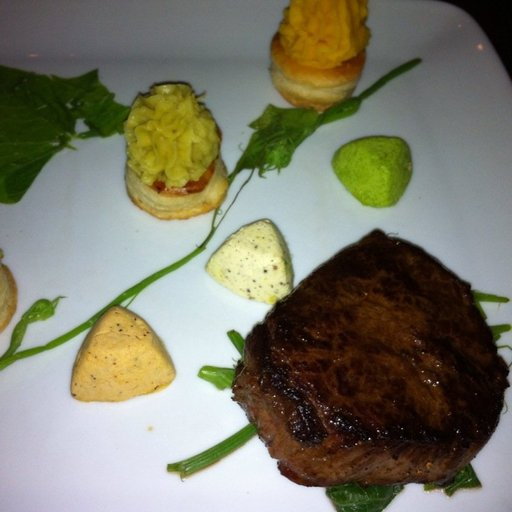

In [12]:
import random
random.seed(42)
from PIL import Image

#1.Get all the image path:
image_path_list=list(image_path.glob("*/*/*.jpg"))

#2.Getting a random image:
image_random=random.choice(image_path_list)

#3.Getting the image class from the path name:
image_class_name=image_random.parent.stem

#4.Opening the random selected image:
img=Image.open(image_random)

#5.print the metadata:
print(f"Random Image: {image_random}")
print(f"Image Classname: {image_class_name}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

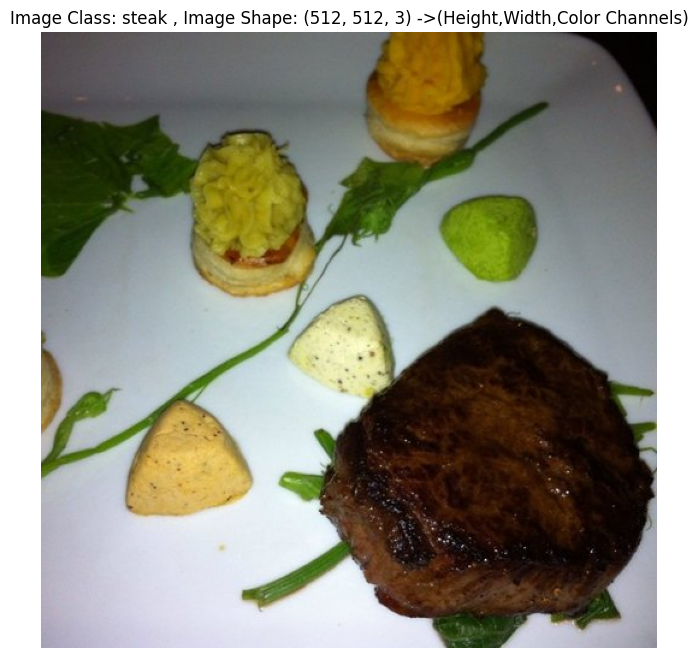

In [13]:
#Visualizing using matplotlib
import numpy as np
import matplotlib.pyplot as plt
image_array=np.asarray(img)
plt.figure(figsize=(10,8))
plt.imshow(image_array)
plt.title(f"Image Class: {image_class_name} , Image Shape: {image_array.shape} ->(Height,Width,Color Channels)")
plt.axis("off")

#Step 3: Turning Images to Tensors:

In [14]:
#Building A transformer Pipeline To transform our images:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
Data_transform=transforms.Compose([  ##We can also use nn.Sequential
    #Resizing the image:
    transforms.Resize(size=(64,64)),
    #Fliping the image horizontally randomly:
    transforms.RandomHorizontalFlip(p=0.5),
    #Transforming image to tensor:
    transforms.ToTensor()
])
Data_transform(img)
print(Data_transform(img).shape)
print(Data_transform(img).dtype)

torch.Size([3, 64, 64])
torch.float32


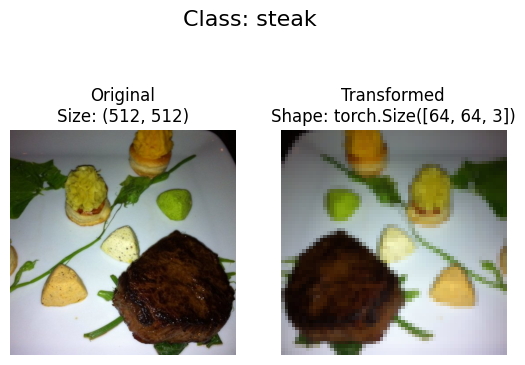

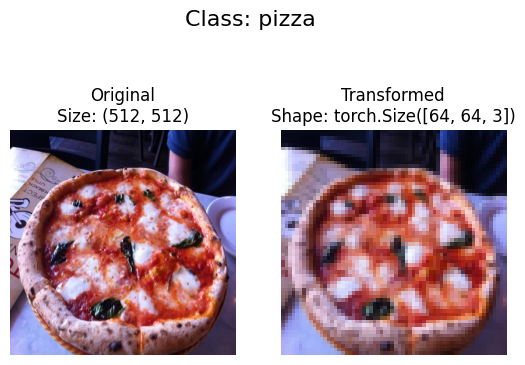

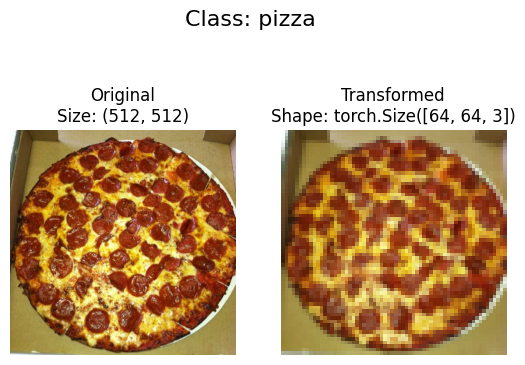

In [15]:
#visualize visualize visualize....
def image_transformer_visualizer(image_paths:list,
                                 transform,
                                 n=3,
                                 seed=None):
  if seed:
    random.seed(seed)
  random_image_path=random.sample(image_paths,k=n)
  for image in random_image_path:
    with Image.open(image) as f:
      fig, ax=plt.subplots(nrows=1,ncols=2)
      #plotting original image:
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis("off")
      #plotting transformed image:
      transformed_image=transform(f).permute(1,2,0) #making change to the shape so as to satisfy matplotlib default image format...(image_channel last)..(C,H,W) to (H,W,C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      class_name = image.parent.stem
      fig.suptitle(f"Class: {class_name}", fontsize=16)
      plt.show()

image_transformer_visualizer(image_paths=image_path_list,
                             transform=Data_transform,
                             n=3,
                             seed=42)

**ImageFolder = organizes & labels data**

---


**DataLoader = feeds data in batches for training**

In [16]:
###Loading All of our images and Turning them in to tensor With ImageFolder:
###ImageFolder Because we all already following standard image classification Format:
train_data=datasets.ImageFolder(root=train_dir,
                                transform=Data_transform,
                                target_transform=None) #transform for the label
test_data=datasets.ImageFolder(root=test_dir,
                               transform=Data_transform,
                               target_transform=None)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
class_name=train_data.classes
class_dict=train_data.class_to_idx

In [18]:
images,labels=train_data[0][0],train_data[0][1]
print(f"Image Tensor: {images}")
print(f"Image Shape: {images.shape}")
print(f"Image DataType: {images.dtype}")
print(f"Image Label: {labels}")
print(f"Label Datatype: {type(labels)}")

Image Tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

In [19]:
images_permute=images.permute(1,2,0)
print(f"Original Shape: {images.shape}")
print(f"Permuted Shape: {images_permute.shape}")

Original Shape: torch.Size([3, 64, 64])
Permuted Shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

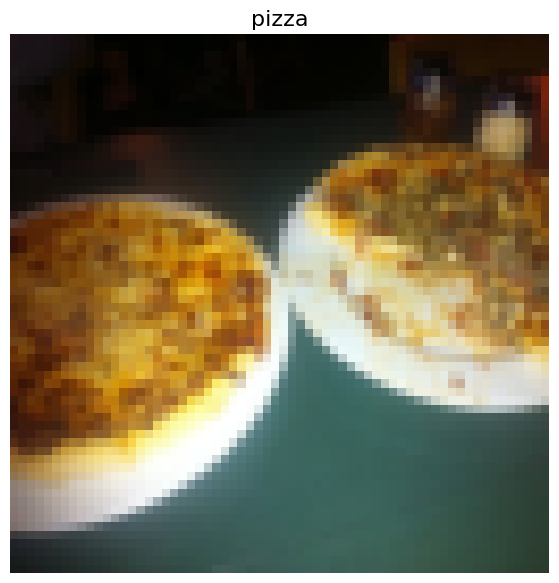

In [20]:
plt.figure(figsize=(10,7))
plt.imshow(images_permute)
plt.axis("off")
plt.title(class_name[labels],fontsize=16)

#Step 4: Creating Datasets to DataLoader:

In [21]:
Train_data_Loader=DataLoader(dataset=train_data,
                             batch_size=1,
                             shuffle=True,
                             num_workers=os.cpu_count())
Test_data_Loader=DataLoader(dataset=test_data,
                            batch_size=1,
                            shuffle=False,
                            num_workers=os.cpu_count())
print(f"Number of Train DataLoader:{len(Train_data_Loader)} of size 32")
print(f"Number of Test DataLoader:{len(Test_data_Loader)} of size 32")

Number of Train DataLoader:225 of size 32
Number of Test DataLoader:75 of size 32


#**What if we don't have torch.datasets.ImageFolder then what???**

In [22]:
#creating our own dataloading function like ImageFolder:
#1.Want to be able to load images from the file.
#2.Want to able to get class names from the Dataset
#3.Want to be able to get clases as Dictinary from the Dataset.

#pros:
#1.Can create a dataset from almost Everything.
#2.Not limited to pytorch pre-built Datasets function.

#cons:
#1.We have to write Code.
#2.Able to bulid dataset from anything Doesn't mean that it will work.

In [23]:
import os
from pathlib import Path
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Dict,Tuple,List

In [24]:
#what torchvision.Datasets.ImageFolder do..
train_data.classes,train_data.class_to_idx #we want to replicate this with our own Dataset organizer like ImageFolder

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [25]:
#creating the helper function to get the class name from the image folders
target_dir=train_dir
print(f"Target Directory: {target_dir}")

Target Directory: data/pizza_steak_sushi/train


In [26]:
#Creating the Funtion to get Class Name From the Target Directory and the index also all in the form of dictionary: (only two)
def Class_name_tar_dir(target_directory):
  class_name_found=sorted([entry.name for entry in list(os.scandir(target_dir))])

  if not class_name_found:
    raise FileNotFoundError(f"{target_directory} does not contain any Class")

  class_to_idx={class_name:i for i , class_name in enumerate(class_name_found)}
  return class_name_found, class_to_idx

In [27]:
Class_name_tar_dir(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [28]:
#Creating our own dataset like ImageFolder:-

#1.Subclass "torch.utils.data.Dataset"

#2.We have to ininlize of subclass with the target directory,tranforms just like we did ImageFolder.

# 3. Create several attributes:
# paths - paths of our images
# transform - the transform we'd like to use
# classes - a list of the target classes
# class_to_idx - a dict of the target classes mapped to integer labels

# 4. Create a function to load_images(), this function will open an image

# 5. Overwrite the __len__() method to return the length of our dataset

# 6. Overwrite the __getitem__() method to return a given sample when passed an index


In [29]:
from pathlib import Path
import pathlib
class ImageFolderCustom(Dataset):
  def __init__(self,
               targ_dir,
               transform=None):
    self.Class_path=list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform=transform
    self.class_names,self.class_to_idx=Class_name_tar_dir(targ_dir)

  def load_image(self,index:int)->Image.Image:
    images_path=self.Class_path[index]
    return Image.open(images_path)

  def __len__(self):
    return len(self.Class_path)

  def __getitem__(self, index):
    img=self.load_image(index)
    class_name=self.Class_path[index].parent.name
    class_to_idx=self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img) ,class_to_idx
    else:
      return img, class_to_idx

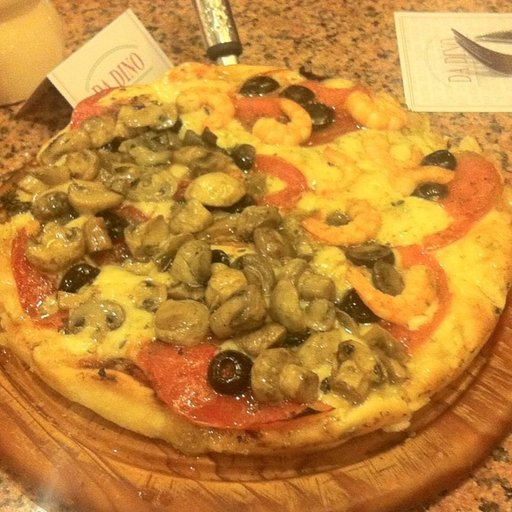

In [30]:
img=ImageFolderCustom(train_dir)
img.load_image(2)

###Compare our custom Dataset class to the original ImageFolder class:

In [31]:
train_transform=transforms.Compose([transforms.Resize(size=(64,64)),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()
                                    ])
test_transform=transforms.Compose([
                                    transforms.Resize(size=(64,64)),
                                    transforms.ToTensor()
])

In [32]:
#Test out custom ImageFolder:
train_data_custom=ImageFolderCustom(targ_dir=train_dir,
                                    transform=train_transform
                                    )
test_data_custom=ImageFolderCustom(targ_dir=test_dir,
                                   transform=test_transform)

In [33]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7d8ca84cd210>,
 <__main__.ImageFolderCustom at 0x7d8ca84cdb50>)

In [34]:
len(train_data),len(train_data_custom)

(225, 225)

In [35]:
len(test_data),len(test_data_custom)

(75, 75)

In [36]:
train_data_custom.class_names

['pizza', 'steak', 'sushi']

In [37]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

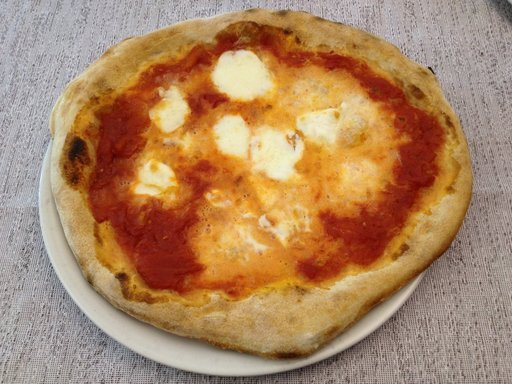

In [38]:
train_data_custom.load_image(23)

In [39]:
#checkeing Similarity to original ImageFolder vs custom ImageFolder:
print(train_data.class_to_idx==train_data_custom.class_to_idx)
print(train_data.classes==train_data_custom.class_names)

True
True


In [40]:
#visualize From the custom Dataset:
#through the rample sample list form train_data_classes
def display_random(dataset:torch.utils.data.Dataset,
                   classes:List[str]=None,
                   n:int=10,
                   display_shape:bool=True,
                   seed:int=None):
  if n>10:
    n=10
    display_shape=False
    print("Coant be Greated 10 than allowed.")

  if seed:
    random.seed(seed)

  random_sam=random.sample(range(len(dataset)),k=n)

  plt.figure(figsize=(20,10))

  for i ,targ_sample in enumerate(random_sam):
    target_img,target_label=dataset[targ_sample][0],dataset[targ_sample][1]

  #Adjust tensor dimension for plotting

    targ_image_adjust=target_img.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")

    if classes:
      title=f"Class: {classes[target_label]}"
    if display_shape:
      title=title+f"\nShape: {targ_image_adjust.shape}"
    plt.title(title)

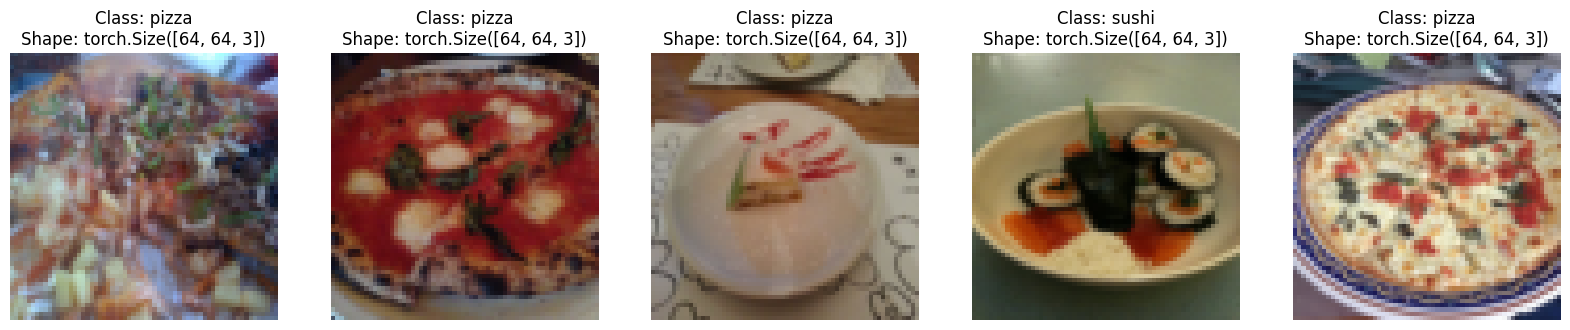

In [41]:
display_random(dataset=train_data,
               classes=train_data.classes,
               n=5,
               seed=None)

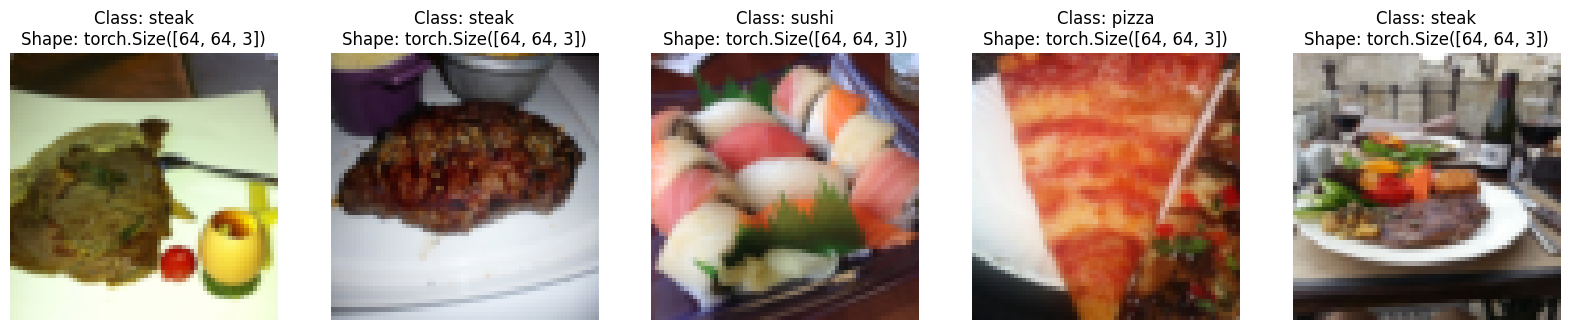

In [42]:
display_random(dataset=train_data_custom,
               classes=train_data_custom.class_names,
               n=5,
               seed=None)

###Custom images to DataLoader:

In [43]:
num_worker=os.cpu_count()
train_data_custom_dataloader=DataLoader(dataset=train_data_custom,
                                        batch_size=32,
                                        num_workers=num_worker,
                                        shuffle=True
                                        )
test_data_custom_datloader=DataLoader(dataset=test_data_custom,
                                        batch_size=32,
                                        num_workers=num_worker,
                                        shuffle=False)
train_data_custom_dataloader,test_data_custom_datloader

(<torch.utils.data.dataloader.DataLoader at 0x7d8ca7b119d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d8ca86c67d0>)

In [44]:
image_custom,label_custom=next(iter(train_data_custom_dataloader))
image_custom.shape,label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

#**Data augmentation Using TorchVision Transforms:**

In [45]:
#Data Augmentation is like looking the same image from Differnt Prespectives,To artificially increase the diversity of a dataset...
#one particular type of Data augmentation:
#Trivial Augment:
from torchvision import transforms
train_transform_aug=transforms.Compose([transforms.Resize(size=(224,224)),
                                        transforms.TrivialAugmentWide(num_magnitude_bins=31), #All type of Augmentations...intensity of the Augementation.
                                        transforms.ToTensor()])
test_transform_aug=transforms.Compose([transforms.Resize(size=(224,224)),
                                        transforms.ToTensor()])

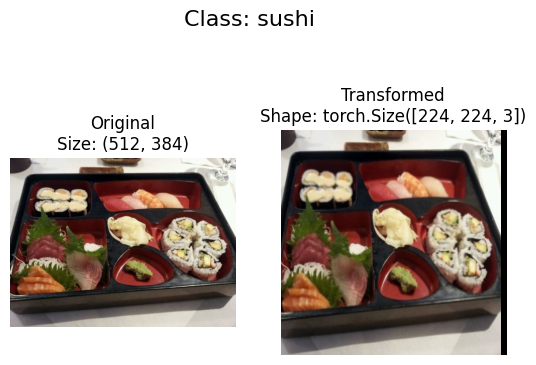

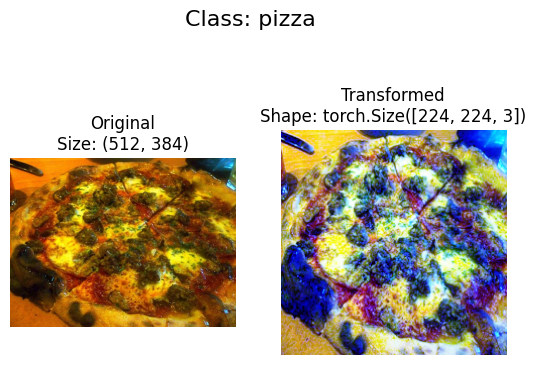

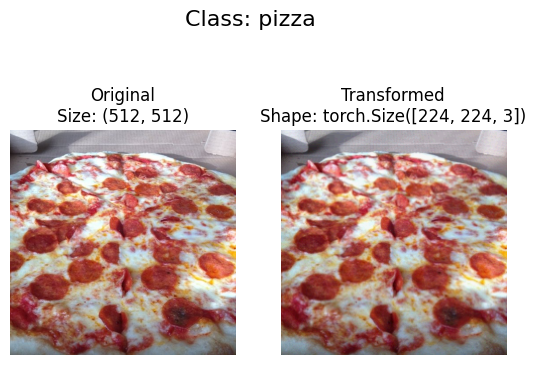

In [46]:
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_transformer_visualizer(image_paths=image_path_list,
                             transform=train_transform_aug,
                             n=3,
                             seed=None)

#**Building the Baseline Model: Loading And transforming the Data**

###Model(0): TinyVGG Architecture Model without Data augmentation

In [47]:
#Creating the Transform and Loading the Model:
simple_transform=transforms.Compose([
                          transforms.Resize(size=(64,64)),
                          transforms.ToTensor()
])

In [48]:
from logging import root
from torchvision import datasets
#ImageFolder:

train_data_simple=datasets.ImageFolder(root=train_dir,
                                      transform=simple_transform)
test_data_simple=datasets.ImageFolder(root=test_dir,
                                      transform=simple_transform)

import os
from torch.utils.data import DataLoader
#DataLoader:

train_data_simple_dataloader=DataLoader(dataset=train_data_simple,
                                       batch_size=32,
                                       shuffle=True,
                                       num_workers=os.cpu_count())
test_data_simple_dataloader=DataLoader(dataset=test_data_simple,
                                       batch_size=32,
                                       shuffle=False,
                                       num_workers=os.cpu_count())

In [49]:
#TinyVGG Architecture:

class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block1=nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.MaxPool2d(stride=2,
                   kernel_size=2)
)
    self.conv_block2=nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.MaxPool2d(stride=2,
                   kernel_size=2)
)
    self.Classifier=nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*13*13,
                out_features=output_shape)
)

  def forward(self,x):
    x=self.conv_block1(x)
    #print(x.shape)             #trick to find the infeatures shape...
    x=self.conv_block2(x)
    #print(x.shape)
    x=self.Classifier(x)
    #print(x.shape)

    return x

In [50]:
model_0=TinyVGG(input_shape=3, ##Number of Color Channels...
                hidden_units=10,
                output_shape=len(class_name)).to(device)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [51]:
#Try a Forward Pass on single Image:#Trick to find the Input features:

# Image_sample,Label_sample=next(iter(train_data_simple_dataloader))
# Image_sample,Label_sample=Image_sample.to(device),Label_sample.to(device)
# model_0(Image_sample)

In [52]:
#Package to look for Input and Output Shape going Through our of Our Model:
##TorchINFO package to get Summary of Our Model:
!pip install Torchinfo
import torchinfo

from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

###Training and Testing Function:

In [53]:
def Train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  model.train()
  train_loss=0
  train_acc=0
  #Going per DataLoader Batch per Data,label:
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)
    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #calculate the accuracy:
    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)

  #adjust metrics to get average loss and accuracy per batch:
  train_loss=train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)
  return train_loss,train_acc

In [54]:
def Test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):
  model.eval()
  test_loss=0
  test_acc=0
  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y=X.to(device),y.to(device)
      test_pred_logits=model(X)
      loss=loss_fn(test_pred_logits,y)
      test_loss+=loss.item()

      #calculate the accuracy:
      test_pred_class=test_pred_logits.argmax(dim=1)
      test_acc+=(test_pred_class==y).sum().item()/len(test_pred_class)

    #adjust metrics to get average loss and accuracy per batch:
  test_loss=test_loss/len(dataloader)
  test_acc=test_acc/len(dataloader)
  return test_loss,test_acc

In [55]:
from tqdm.auto import tqdm
def training(model:torch.nn.Module,
             train_dataloader:torch.utils.data.DataLoader,
             test_dataloader:torch.utils.data.DataLoader,
             optimizer:torch.optim.Optimizer,
             loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
             epochs:int=5,
             device=device):
  #creating empty Dictionary result:
  result={"train_loss": [],
          "train_accuracy": [],
          "test_loss": [],
          "test_accuracy": []}
  for epoch in tqdm(range(epochs)):
    train_loss,train_acc=Train_step(model=model_0,
                                    dataloader=train_dataloader,
                                    loss_fn=loss_fn,
                                    optimizer=optimizer,
                                    device=device)
    test_loss,test_acc=Test_step(model=model_0,
                                 dataloader=test_dataloader,
                                 loss_fn=loss_fn,
                                 device=device)

    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

    result["train_loss"].append(train_loss)
    result["train_accuracy"].append(train_acc)
    result["test_loss"].append(test_loss)
    result["test_accuracy"].append(test_acc)

  return result

###Train and Evaluate Model_0:

In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

num_epochs=5
model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_name)).to(device)

#loss function and Optimizer:
loss_fn=nn.CrossEntropyLoss()
optimizer_train=torch.optim.Adam(params=model_0.parameters(),
                           lr=0.001)
from timeit import default_timer as Timer
start_time=Timer()
model_0_result=training(model=model_0,
                        train_dataloader=train_data_simple_dataloader,
                        test_dataloader=test_data_simple_dataloader,
                        optimizer=optimizer_train,
                        loss_fn=loss_fn,
                        epochs=num_epochs,
                        device=device)
end_time=Timer()
print(f"Total Training Time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1063 | Train accuracy: 0.3047 | Test loss: 1.0983 | Test Accuracy: 0.3011
Epoch: 1 | Train loss: 1.0998 | Train accuracy: 0.3281 | Test loss: 1.0697 | Test Accuracy: 0.5417
Epoch: 2 | Train loss: 1.0869 | Train accuracy: 0.4883 | Test loss: 1.0808 | Test Accuracy: 0.4924
Epoch: 3 | Train loss: 1.0842 | Train accuracy: 0.3984 | Test loss: 1.0608 | Test Accuracy: 0.5833
Epoch: 4 | Train loss: 1.0662 | Train accuracy: 0.4141 | Test loss: 1.0654 | Test Accuracy: 0.5644
Total Training Time: 19.405 seconds


#DEBUGGING:

In [57]:
model_0_result

{'train_loss': [1.106319084763527,
  1.0998057276010513,
  1.0868544578552246,
  1.0842333287000656,
  1.0662163645029068],
 'train_accuracy': [0.3046875, 0.328125, 0.48828125, 0.3984375, 0.4140625],
 'test_loss': [1.0983205238978069,
  1.069690187772115,
  1.0807572205861409,
  1.0608318249384563,
  1.0653960307439168],
 'test_accuracy': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

###Training and Testing Loss Curve:



In [58]:
model_0_result.keys()

dict_keys(['train_loss', 'train_accuracy', 'test_loss', 'test_accuracy'])

In [59]:
def plot_loss_curve(results:Dict[str,List[float]]):
  loss=results["train_loss"]
  test_loss=results["test_loss"]
  accuracy=results["train_accuracy"]
  test_accuracy=results["test_accuracy"]

  epochs=range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))

  #plot the loss:
  plt.subplot(1,2,1)##first row,second column and index number one.
  plt.plot(epochs,loss,label="Train_loss")
  plt.plot(epochs,test_loss,label="Test_loss")
  plt.title("Loss Curve")
  plt.xlabel("Epochs")
  plt.legend()

  #plot the Accuracy:
  plt.subplot(1,2,2)##first row,second column and index number one.
  plt.plot(epochs,accuracy,label="Train_Accuracy")
  plt.plot(epochs,test_accuracy,label="Test_Accuracy")
  plt.title("Accuracy Curve")
  plt.xlabel("Epochs")
  plt.legend()

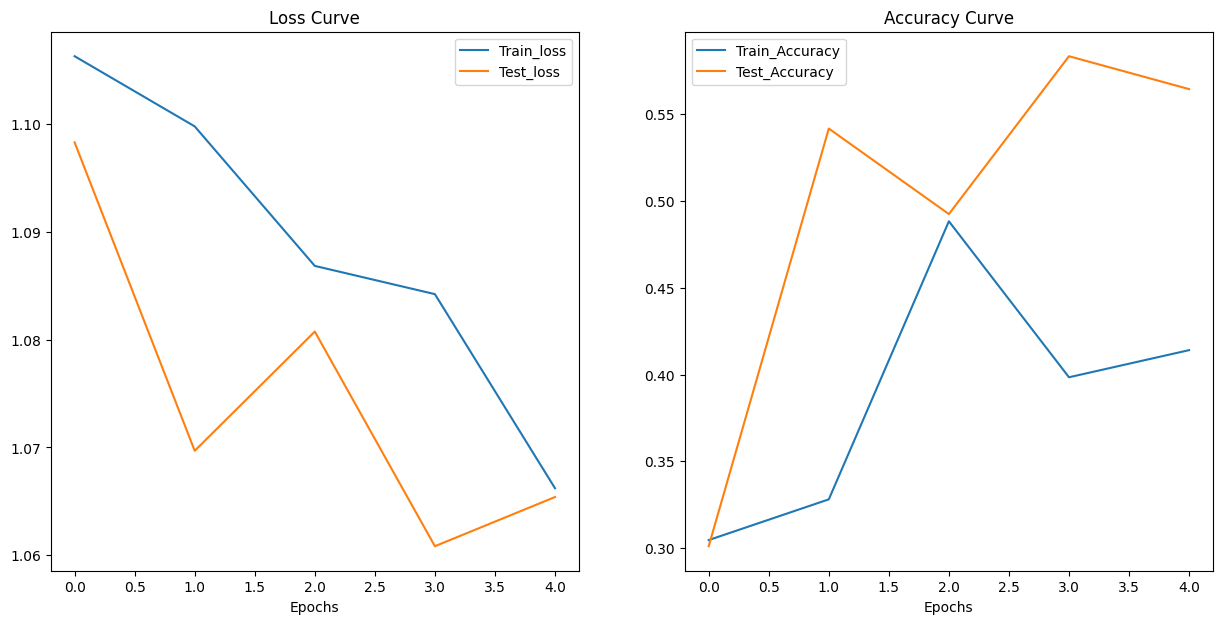

In [60]:
plot_loss_curve(model_0_result)

###Ways to Deal with overfitting or underfitting Curve:

Method to improve a model(reduce OverFitting):

---



1.   **Get More Data**-: Give a model more chance to learn patterns between the samples.
2.   **Data augmentation**-: Increase the diversity in the dataset without collecting More data.
3.   **Better data**-: Get better data example.
4.   **Use Transfer Learning**-: Take a model that is pre-trained from one problem and use it for your problem.
5.   **Simplify your model**-: Reduce the Number of layers.
6.   **Use Learning rate Decay**-: The idea is to decay the learning rate as the model trains.
7.   **Use the Earling stoping**-: Stop the model training before it overfits.
8.   **Use more Regularization**-: L1 or L2 regularization.








Method to improve a model(reduce underfitting):

---



1.   **Add more layers/units to your model**-: Add more Predicting Power.
2.  **Tweak the learning rate**-:low your learning rate because the model is not able to learn anything.
3.   **Train for Longer**-: A model may need a much more time to learn representation of data.
4.   **Use Transfer Learning**-: Take a model that is pre-trained from one problem and use it for your problem.
5.   **Use Less regularization**-: Hold back on regularization techniques.







#Model(1): Model with Data augmentation:

In [61]:
train_transform_trivial=transforms.Compose([transforms.Resize(size=(64,64)),
                                           transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                           transforms.ToTensor()])
test_transform_simple=transforms.Compose([transforms.Resize(size=(64,64)),
                                          transforms.ToTensor()])

In [62]:
#Image Folder:
Train_trivial_dataset=datasets.ImageFolder(root=train_dir,
                                           transform=train_transform_trivial,
                                           )
Test_simple_dataset=datasets.ImageFolder(root=test_dir,
                                         transform=test_transform_simple)

#DataLoader:
torch.manual_seed(42)
train_data_Trivial_dataloader=DataLoader(dataset=Train_trivial_dataset,
                                         shuffle=True,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         )
test_data_simple_dataloader=DataLoader(dataset=Test_simple_dataset,
                                       shuffle=False,
                                       batch_size=32,
                                       num_workers=os.cpu_count())


In [63]:
#Model instance:
#Same Model architecture as Model_0 but with augmented Data:
torch.manual_seed(42)
Model_1=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(Train_trivial_dataset.classes)).to(device)
Model_1

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [64]:
#Reproducibility:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
num_epochs=5

#Loss Function:
loss_fn_triv=nn.CrossEntropyLoss()
#optimizer:
optimizer_triv=torch.optim.Adam(params=Model_1.parameters(),
                                lr=0.001)

from timeit import default_timer as timer
start_time=timer()

#Training the Model:
model_1_result=training(model=Model_1,
         train_dataloader=train_data_Trivial_dataloader,
         test_dataloader=test_data_simple_dataloader,
         loss_fn=loss_fn_triv,
         optimizer=optimizer_triv,
         epochs=num_epochs,
         device=device)

end_time=timer()
print(f"Total Time took For Training Model_1: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0794 | Train accuracy: 0.3789 | Test loss: 1.0654 | Test Accuracy: 0.5644
Epoch: 1 | Train loss: 1.0941 | Train accuracy: 0.4258 | Test loss: 1.0654 | Test Accuracy: 0.5644
Epoch: 2 | Train loss: 1.0546 | Train accuracy: 0.4258 | Test loss: 1.0654 | Test Accuracy: 0.5644
Epoch: 3 | Train loss: 1.0558 | Train accuracy: 0.5156 | Test loss: 1.0654 | Test Accuracy: 0.5644
Epoch: 4 | Train loss: 1.0605 | Train accuracy: 0.4258 | Test loss: 1.0654 | Test Accuracy: 0.5644
Total Time took For Training Model_1: 10.501 seconds


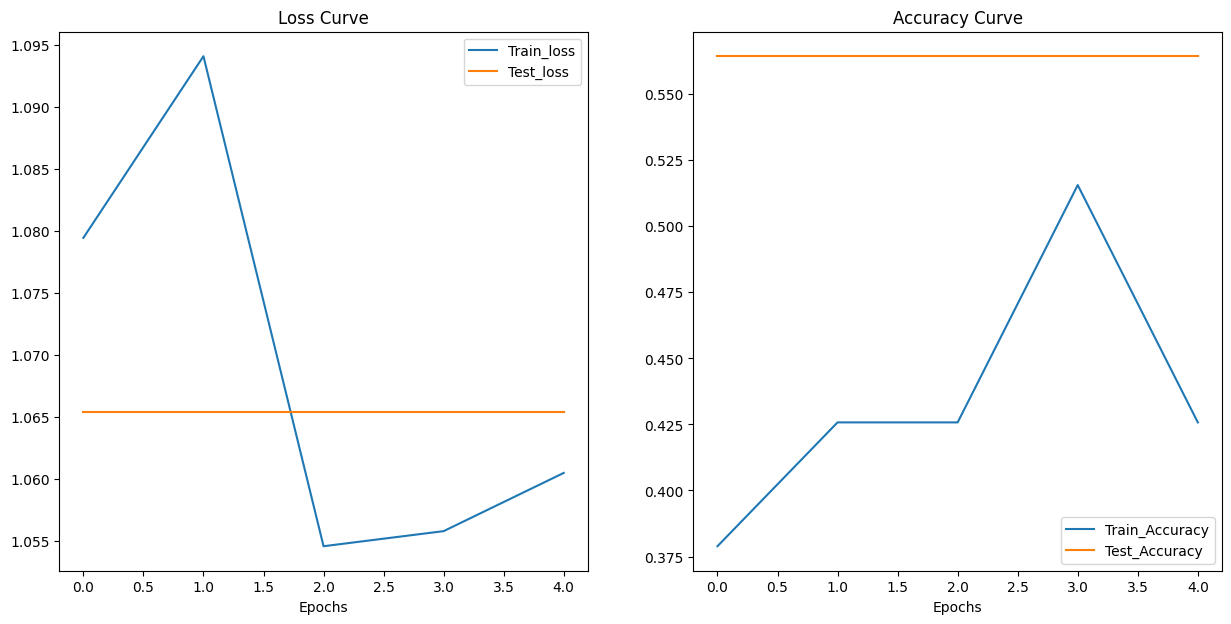

In [65]:
plot_loss_curve(model_1_result)

###Comparing Both model side by side:

In [66]:
import pandas as pd
model_0_df=pd.DataFrame(model_0_result)
model_1_df=pd.DataFrame(model_1_result)
model_0_df

train_loss  train_accuracy  test_loss  test_accuracy
0    1.106319        0.304688   1.098321       0.301136
1    1.099806        0.328125   1.069690       0.541667
2    1.086854        0.488281   1.080757       0.492424
3    1.084233        0.398438   1.060832       0.583333
4    1.066216        0.414062   1.065396       0.564394

In [67]:
model_1_df

train_loss  train_accuracy  test_loss  test_accuracy
0    1.079440        0.378906   1.065396       0.564394
1    1.094070        0.425781   1.065396       0.564394
2    1.054599        0.425781   1.065396       0.564394
3    1.055814        0.515625   1.065396       0.564394
4    1.060504        0.425781   1.065396       0.564394

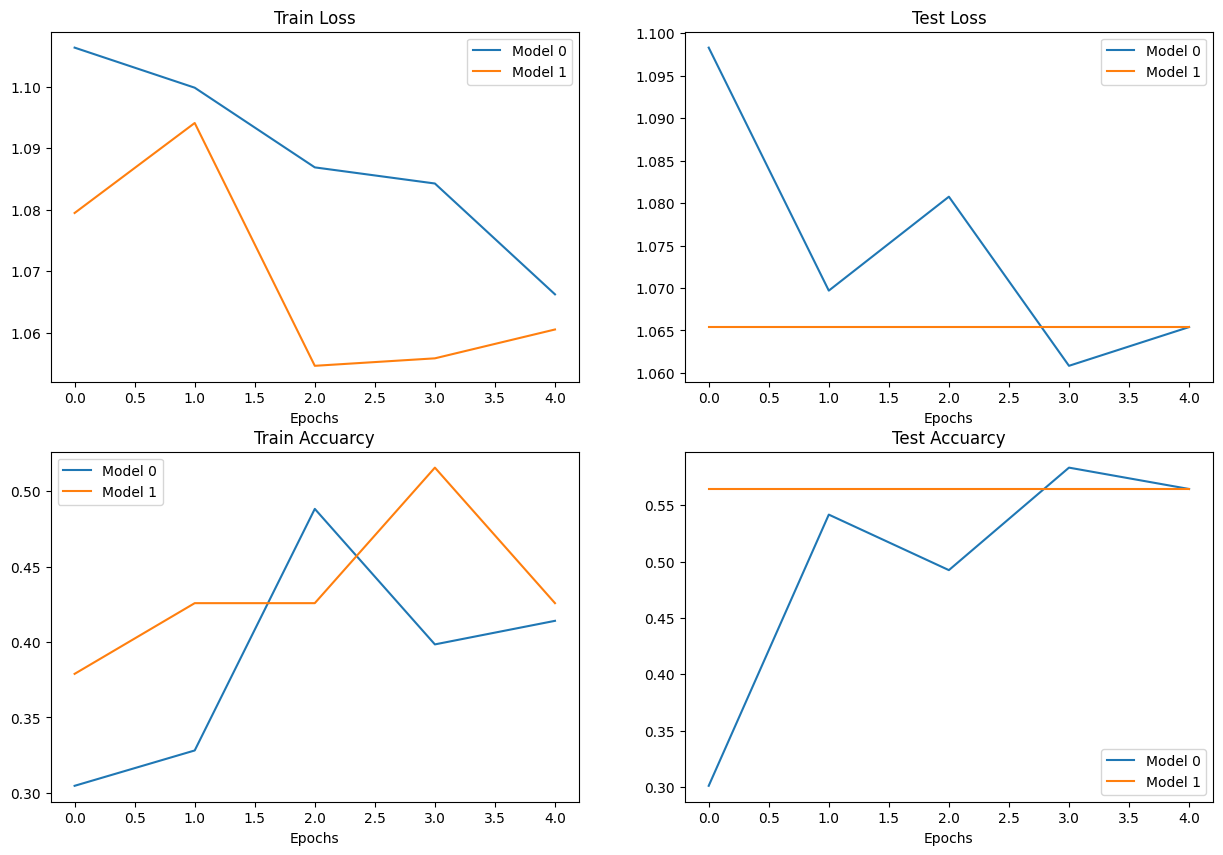

In [68]:
#setup a plot
plt.figure(figsize=(15,10))
epochs=range(len(model_0_df))

#Plot Train loss:
plt.subplot(2,2,1)
plt.plot(epochs,model_0_df["train_loss"],label="Model 0")
plt.plot(epochs,model_1_df["train_loss"],label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

#plot Test Loss:
plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["test_loss"],label="Model 0")
plt.plot(epochs,model_1_df["test_loss"],label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

#plot Train Accuracy:
plt.subplot(2,2,3)
plt.plot(epochs,model_0_df["train_accuracy"],label="Model 0")
plt.plot(epochs,model_1_df["train_accuracy"],label="Model 1")
plt.title("Train Accuarcy")
plt.xlabel("Epochs")
plt.legend()

#plot Test Accuracy:
plt.subplot(2,2,4)
plt.plot(epochs,model_0_df["test_accuracy"],label="Model 0")
plt.plot(epochs,model_1_df["test_accuracy"],label="Model 1")
plt.title("Test Accuarcy")
plt.xlabel("Epochs")
plt.legend()

#Model(2)-No Augmentation But since our zeroth Model was kind of underfitting we will increase the number of epochs and Hidden layer units

In [69]:
Model_0_extend=TinyVGG(input_shape=3,
                       hidden_units=30,
                       output_shape=len(class_name)).to(device)
Model_0_extend

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 30, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5070, out_features=3, bias=True)
  )
)

In [70]:
#Reproducibility:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
num_epochs=15

#Loss Function:
loss_fn_triv=nn.CrossEntropyLoss()
#optimizer:
optimizer_triv=torch.optim.Adam(params=Model_0_extend.parameters(),
                                lr=0.001)

from timeit import default_timer as timer
start_time=timer()

#Training the Model:
model_2_result=training(model=model_0,
                        train_dataloader=train_data_simple_dataloader,
                        test_dataloader=test_data_simple_dataloader,
                        optimizer=optimizer_train,
                        loss_fn=loss_fn,
                        epochs=num_epochs,
                        device=device)

end_time=timer()
print(f"Total Time took For Training Model_2: {end_time-start_time:.3f} seconds")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0347 | Train accuracy: 0.4102 | Test loss: 1.0216 | Test Accuracy: 0.5038
Epoch: 1 | Train loss: 0.9433 | Train accuracy: 0.6016 | Test loss: 1.0707 | Test Accuracy: 0.3627
Epoch: 2 | Train loss: 0.9166 | Train accuracy: 0.5664 | Test loss: 1.0707 | Test Accuracy: 0.2812
Epoch: 3 | Train loss: 0.9477 | Train accuracy: 0.5234 | Test loss: 1.0203 | Test Accuracy: 0.3106
Epoch: 4 | Train loss: 0.8390 | Train accuracy: 0.6719 | Test loss: 1.0193 | Test Accuracy: 0.3930
Epoch: 5 | Train loss: 0.9978 | Train accuracy: 0.5000 | Test loss: 1.0088 | Test Accuracy: 0.3712
Epoch: 6 | Train loss: 0.7662 | Train accuracy: 0.6484 | Test loss: 1.0546 | Test Accuracy: 0.5152
Epoch: 7 | Train loss: 0.8124 | Train accuracy: 0.6914 | Test loss: 1.0495 | Test Accuracy: 0.3305
Epoch: 8 | Train loss: 0.9183 | Train accuracy: 0.4961 | Test loss: 1.0372 | Test Accuracy: 0.3617
Epoch: 9 | Train loss: 0.8212 | Train accuracy: 0.5508 | Test loss: 0.9598 | Test Accuracy: 0.5445
Epoch: 10 

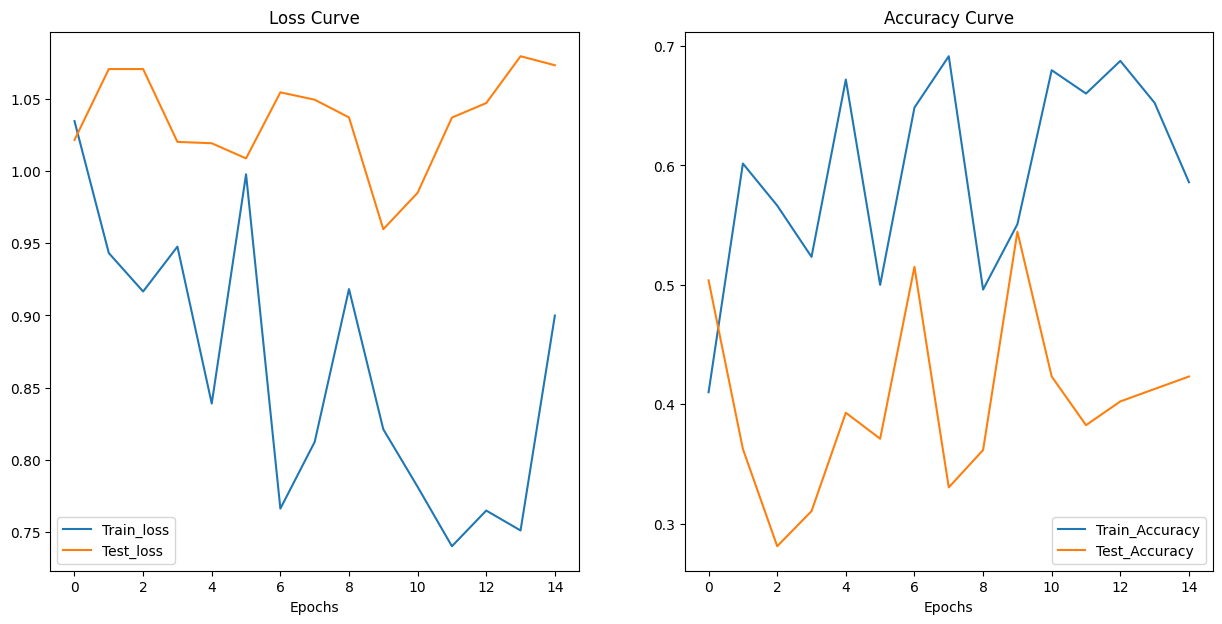

In [71]:
plot_loss_curve(model_2_result)

###Result :- OverFitting

#Model(3): Less increase on hidden data units and epochs:

In [72]:
Model_3=TinyVGG(input_shape=3,
                hidden_units=15,
                output_shape=len(class_name)).to(device)
Model_3

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 15, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2535, out_features=3, bias=True)
  )
)

In [73]:
#Reproducibility:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
num_epochs=10

#Loss Function:
loss_fn_=nn.CrossEntropyLoss()
#optimizer:
optimizer=torch.optim.Adam(params=Model_3.parameters(),
                                lr=0.001)

from timeit import default_timer as timer
start_time=timer()

#Training the Model:
model_3_result=training(model=Model_3,
                        train_dataloader=train_data_simple_dataloader,
                        test_dataloader=test_data_simple_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=num_epochs,
                        device=device)

end_time=timer()
print(f"Total Time took For Training Model_2: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.7514 | Train accuracy: 0.5938 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 1 | Train loss: 0.7369 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 2 | Train loss: 0.6904 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 3 | Train loss: 0.7834 | Train accuracy: 0.5938 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 4 | Train loss: 0.6855 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 5 | Train loss: 0.8378 | Train accuracy: 0.5938 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 6 | Train loss: 0.6615 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 7 | Train loss: 0.6900 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 8 | Train loss: 0.7890 | Train accuracy: 0.5938 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 9 | Train loss: 0.6936 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Total Time

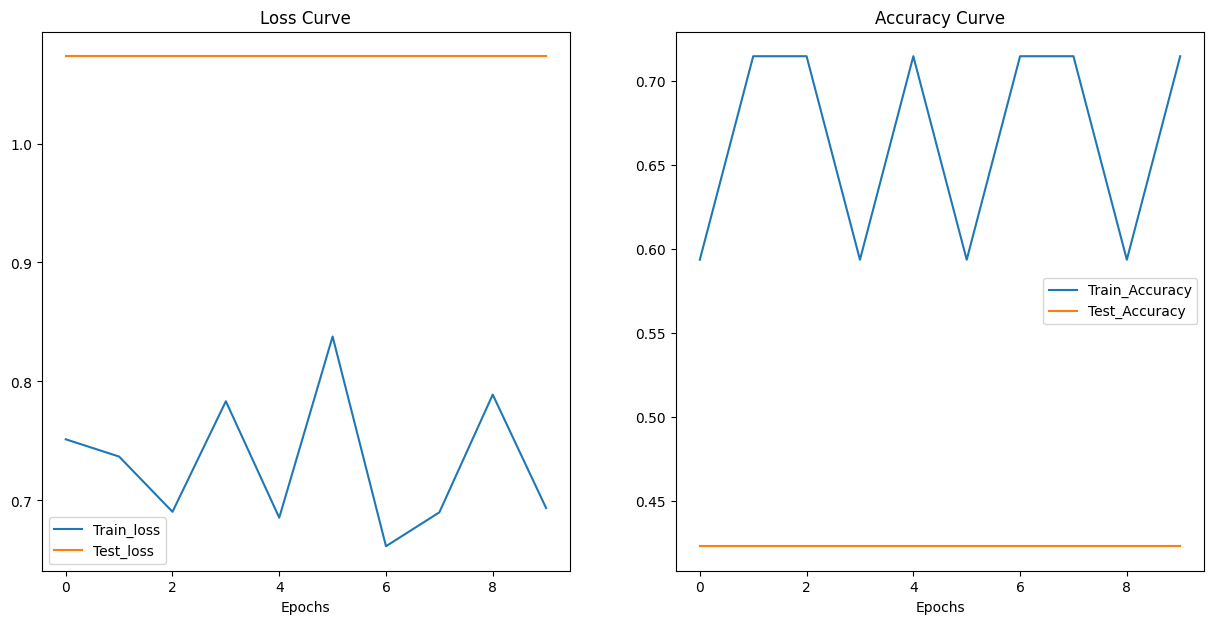

In [74]:
plot_loss_curve(model_3_result)

#Model(4)- Just Training the zeroth model for more Epochs:

In [75]:
model_4_=TinyVGG(input_shape=3,
                hidden_units=32,
                output_shape=len(class_name)).to(device)
model_4_

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5408, out_features=3, bias=True)
  )
)

In [76]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

num_epochs=10
#loss function and Optimizer:
loss_fn=nn.CrossEntropyLoss()
optimizer_train=torch.optim.Adam(params=model_4_.parameters(),
                           lr=0.001)
from timeit import default_timer as Timer
start_time=Timer()
model_4___result=training(model=model_4_,
                        train_dataloader=train_data_simple_dataloader,
                        test_dataloader=test_data_simple_dataloader,
                        optimizer=optimizer_train,
                        loss_fn=loss_fn,
                        epochs=num_epochs,
                        device=device)
end_time=Timer()
print(f"Total Training Time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.7514 | Train accuracy: 0.5938 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 1 | Train loss: 0.7369 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 2 | Train loss: 0.6904 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 3 | Train loss: 0.7834 | Train accuracy: 0.5938 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 4 | Train loss: 0.6855 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 5 | Train loss: 0.8378 | Train accuracy: 0.5938 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 6 | Train loss: 0.6615 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 7 | Train loss: 0.6900 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 8 | Train loss: 0.7890 | Train accuracy: 0.5938 | Test loss: 1.0734 | Test Accuracy: 0.4233
Epoch: 9 | Train loss: 0.6936 | Train accuracy: 0.7148 | Test loss: 1.0734 | Test Accuracy: 0.4233
Total Trai

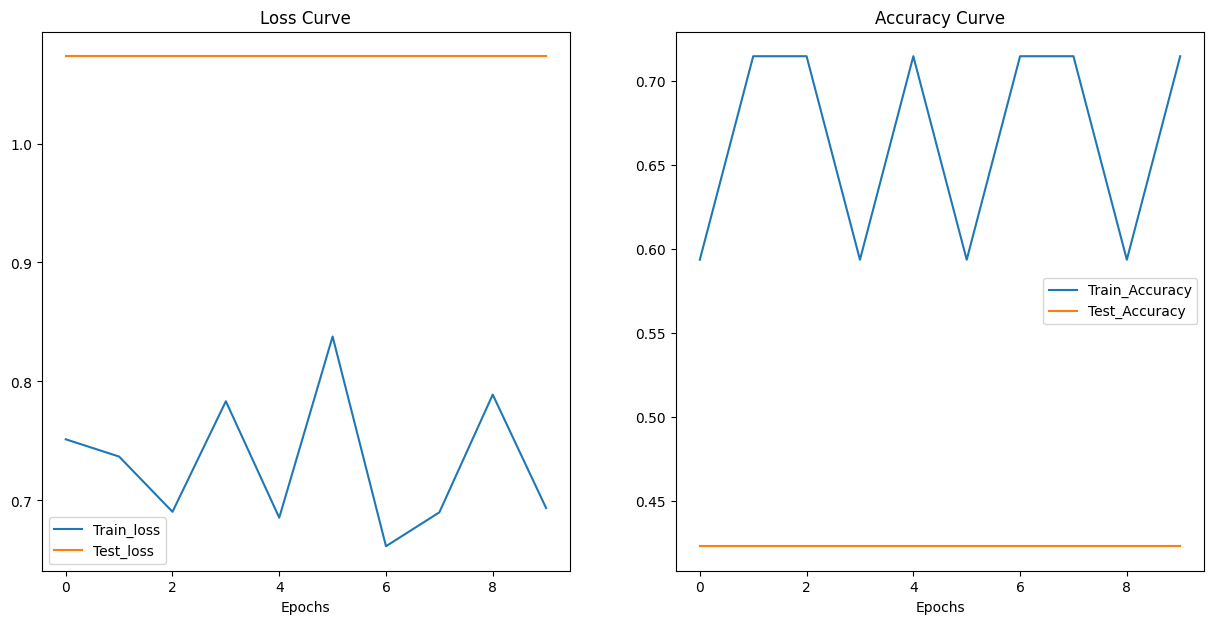

In [77]:
plot_loss_curve(model_4___result)

#Model(5):Making a litle changes in Model 0 from its understanding:

In [94]:
train_transform_updated=transforms.Compose([transforms.Resize(size=(224,224)),
                                           transforms.ToTensor()])
test_transform_updated=transforms.Compose([transforms.Resize(size=(224,224)),
                                          transforms.ToTensor()])

In [95]:
#ImageFolder:

train_data_updated=datasets.ImageFolder(root=train_dir,
                                      transform=train_transform_updated)
test_data_updated=datasets.ImageFolder(root=test_dir,
                                      transform=test_transform_updated)

#DataLoader:

train_data_updated_dataloader=DataLoader(dataset=train_data_updated,
                                       batch_size=32,
                                       shuffle=True,
                                       num_workers=os.cpu_count())
test_data_updated_dataloader=DataLoader(dataset=test_data_updated,
                                       batch_size=32,
                                       shuffle=False,
                                       num_workers=os.cpu_count())

In [96]:
#TinyVGG updated Architecture:

class TinyVGG_updated(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block1=nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.MaxPool2d(stride=2,
                   kernel_size=2)
)
    self.conv_block2=nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.MaxPool2d(stride=2,
                   kernel_size=2)
)
    self.conv_block3=nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
      nn.ReLU(),
      nn.MaxPool2d(stride=2,
                   kernel_size=2)
)
    self.Classifier=nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*24*24,
                out_features=output_shape)
)

  def forward(self,x):
    x=self.conv_block1(x)
    print(x.shape)             #trick to find the infeatures shape...
    x=self.conv_block2(x)
    print(x.shape)
    x=self.conv_block3(x)
    print(x.shape)
    x=self.Classifier(x)
    print(x.shape)

    return x

In [97]:
model_5=TinyVGG_updated(input_shape=3,
                        hidden_units=10,
                        output_shape=len(class_name)).to(device)

model_5

TinyVGG_updated(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5760, out_features=3, bias=True)
  )
)

In [98]:
Image_sample,Label_sample=next(iter(train_data_updated_dataloader))
model_5(Image_sample)

torch.Size([32, 10, 110, 110])
torch.Size([32, 10, 53, 53])
torch.Size([32, 10, 24, 24])
torch.Size([32, 3])


tensor([[0.0213, 0.0019, 0.0069],
        [0.0208, 0.0018, 0.0068],
        [0.0209, 0.0020, 0.0069],
        [0.0213, 0.0018, 0.0069],
        [0.0209, 0.0018, 0.0067],
        [0.0213, 0.0016, 0.0068],
        [0.0212, 0.0020, 0.0071],
        [0.0211, 0.0019, 0.0071],
        [0.0211, 0.0019, 0.0070],
        [0.0212, 0.0019, 0.0067],
        [0.0211, 0.0018, 0.0071],
        [0.0212, 0.0019, 0.0070],
        [0.0214, 0.0017, 0.0070],
        [0.0212, 0.0018, 0.0069],
        [0.0212, 0.0019, 0.0069],
        [0.0211, 0.0019, 0.0068],
        [0.0211, 0.0016, 0.0068],
        [0.0212, 0.0019, 0.0069],
        [0.0212, 0.0017, 0.0072],
        [0.0210, 0.0018, 0.0067],
        [0.0213, 0.0019, 0.0068],
        [0.0213, 0.0019, 0.0072],
        [0.0210, 0.0022, 0.0075],
        [0.0212, 0.0017, 0.0070],
        [0.0213, 0.0020, 0.0069],
        [0.0211, 0.0017, 0.0067],
        [0.0211, 0.0019, 0.0069],
        [0.0213, 0.0018, 0.0071],
        [0.0211, 0.0018, 0.0070],
        [0.020

In [99]:
summary(model_5,input_size=[1,3,224,224])

torch.Size([1, 10, 110, 110])
torch.Size([1, 10, 53, 53])
torch.Size([1, 10, 24, 24])
torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG_updated                          [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 110, 110]         --
│    └─Conv2d: 2-1                       [1, 10, 222, 222]         280
│    └─ReLU: 2-2                         [1, 10, 222, 222]         --
│    └─Conv2d: 2-3                       [1, 10, 220, 220]         910
│    └─ReLU: 2-4                         [1, 10, 220, 220]         --
│    └─MaxPool2d: 2-5                    [1, 10, 110, 110]         --
├─Sequential: 1-2                        [1, 10, 53, 53]           --
│    └─Conv2d: 2-6                       [1, 10, 108, 108]         910
│    └─ReLU: 2-7                         [1, 10, 108, 108]         --
│    └─Conv2d: 2-8                       [1, 10, 106, 106]         910
│    └─ReLU: 2-9                         [1, 10, 106, 106]         --
│    └─MaxPool2d: 2-10                   [1, 10, 53, 53]           --
├─Sequentia

In [100]:
for images, labels in train_data_updated_dataloader:
    print(images.shape)  # Should be [32, 3, 224, 224]
    outputs = model_5(images)  # Should work without shape error now
    break


torch.Size([32, 3, 224, 224])
torch.Size([32, 10, 110, 110])
torch.Size([32, 10, 53, 53])
torch.Size([32, 10, 24, 24])
torch.Size([32, 3])
